# Titanic Survival Prediction

#### Importing the Dependencies

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

#### Data Collection and Processing

In [31]:
df = pd.read_csv("train.csv")

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
df.shape

(891, 12)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Handling the Missing Values

In the 'Cabin' column, there are too many missing values to handle, 
so the reasonable thing to do is to drop the column completely. In 
the 'Age' column, there are less missing values, and we can replace 
them with the mean value of the 'Age' column. And as in the 'Embark' column, where we don't have integers, we get the value, that appears the most, which is the mode.

In [46]:
df.drop(columns = 'Cabin', inplace = True)

In [49]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [52]:
print(df['Embarked'].mode())

0    S
dtype: object


In [55]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

#### Data Analysis

In [58]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### Data Visualization

In [62]:
sns.set()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

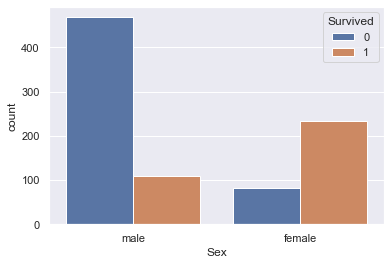

In [64]:
sns.countplot('Sex', hue = 'Survived', data = df)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

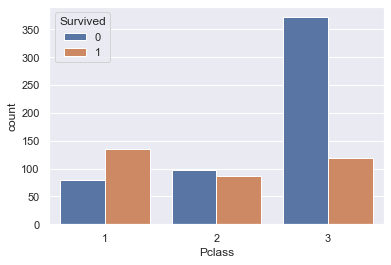

In [66]:
sns.countplot('Pclass', hue = 'Survived', data = df)

#### Encoding the Categorical Columns

In [67]:
df.replace({'Sex' : {'male' : 0, 'female' : 1}, 'Embarked' : {'S' : 0, 'C' : 1, 'Q' : 2}}, inplace = True)

#### Train-test Split

In [68]:
X = df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Survived'], axis = 1)

In [69]:
y = df['Survived']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

#### Model Selection and Hyperparameter Tuning

In [71]:
model_parameters = {
    'SVM' : {
        'model' : svm.SVC(gamma = 'auto'),
        'parameters' : { 'C' : [1, 10, 20], 'kernel' : ['rbf', 'linear']}
    },
    
    'Logistic_Regression' : {
        'model' : LogisticRegression(solver='liblinear', multi_class='auto'),
        'parameters' : {'C' : [1, 5, 10]}
    }
} 

In [72]:
scores = []

for model_name, mp in model_parameters.items():
    clf = GridSearchCV(mp['model'], mp['parameters'], cv = 5, return_train_score = False)
    clf.fit(X_train, y_train)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })
    
data_frame = pd.DataFrame(scores, columns = ['model','best_score','best_params'])
print(data_frame)

                 model  best_score                    best_params
0                  SVM    0.790820  {'C': 20, 'kernel': 'linear'}
1  Logistic_Regression    0.809061                       {'C': 1}


#### Model Training

In [73]:
model = LogisticRegression(solver='liblinear', multi_class='auto', C = 1)
model.fit(X_train, y_train)

LogisticRegression(C=1, solver='liblinear')

In [74]:
X_train_prediction = model.predict(X_train)

In [75]:
y_pred = model.predict(X_test)
print(y_pred)

[1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0
 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1]


#### Model Evaluation

In [76]:
acc_train = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of the training data: ', acc_train)

Accuracy score of the training data:  0.8047752808988764


In [77]:
acc_test = accuracy_score(y_test, y_pred)
print('Accuracy score of the testing data: ', acc_test)

Accuracy score of the testing data:  0.7988826815642458


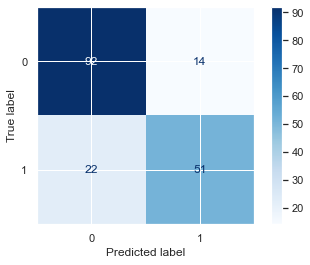

In [78]:
cmatrix = plot_confusion_matrix(model, X_test, y_test, cmap = 'Blues')

In [79]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       106
           1       0.78      0.70      0.74        73

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



#### Testing

In [80]:
test_data = pd.read_csv("test.csv")

In [81]:
test_data['Age'].fillna(test_data['Age'].mean(), inplace = True)
test_data['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
test_data.replace({'Sex' : {'male' : 0, 'female' : 1}, 'Embarked' : {'S' : 0, 'C' : 1, 'Q' : 2}}, inplace = True)

In [82]:
x = test_data.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [83]:
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace = True)

In [84]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [ ]:
final_pred = model.predict(x)

In [ ]:
final_pred